# Part I - Prosper_Loan_Data_Exploration
## by: Ige Amos Fadele

## Introduction

This document explores a data set named "Prosper Loan Data" which contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

The complete data dictionary which can be found **<a href="https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&source=editors&ust=1664470301975729&usg=AOvVaw0paZJj06ooBawH0ZBfw-Jv"> HERE </a>**  explains all the variables in the data set.

## Preliminary Wrangling

> ### Importing Needed Packages

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> ### Loading Dataset & Getting Some Summary Statistics And Overview

In [2]:
# load in the dataset into a pandas dataframe
loans = pd.read_csv('prosperLoanData.csv')

In [3]:
# Visually checking first few rows of the dataframe
loans.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
# Types of Prosper rating ()Alpha
ProsperRating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']

ProsperRatingClasses = pd.api.types.CategoricalDtype(ordered=True, categories=ProsperRating)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
loans['ProsperRating'] = loans['ProsperRating (Alpha)'].astype(ProsperRatingClasses);

loans['ProsperRating'].value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating, dtype: int64

In [5]:
# Checking the datatypes of the variables
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype   
---  ------                               --------------   -----   
 0   ListingKey                           113937 non-null  object  
 1   ListingNumber                        113937 non-null  int64   
 2   ListingCreationDate                  113937 non-null  object  
 3   CreditGrade                          28953 non-null   object  
 4   Term                                 113937 non-null  int64   
 5   LoanStatus                           113937 non-null  object  
 6   ClosedDate                           55089 non-null   object  
 7   BorrowerAPR                          113912 non-null  float64 
 8   BorrowerRate                         113937 non-null  float64 
 9   LenderYield                          113937 non-null  float64 
 10  EstimatedEffectiveYield              84853 non-null   float64 
 11  

### What is the structure of your dataset?

There are 113937 loans (rows) and 81 features/variables (columns) in the dataset. Also, it's seen that most variables are numeric in nature

### What is/are the main feature(s) of interest in your dataset?

I'm interested in figuring out the factors that affects the outcome of a loan.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that factors like Credit Score, employment status, Prosper rating, home-ownership, loan term and similar indicators will affect the outcome of a loan. 

Credit score is a fatcor used by many financial institutions to determine the eligibility and risk-level of a prospective borrower. 

Concerning employment status, I opines that those who are actively employed would have a good chance of paying their loans on time and thereby having a good loan outcome. 

Also, loan term could have an impact as well, the longer period a loan is given to be repaid can have both positive and negative effect on a loan outcome.

## Univariate Exploration

I'm starting by investigating the features of interest individually.


### Distributions of the Loan Status

In [6]:
# Checking the unique values in Loan Ststus
loans["LoanStatus"].unique()

array(['Completed', 'Current', 'Past Due (1-15 days)', 'Defaulted',
       'Chargedoff', 'Past Due (16-30 days)', 'Cancelled',
       'Past Due (61-90 days)', 'Past Due (31-60 days)',
       'Past Due (91-120 days)', 'FinalPaymentInProgress',
       'Past Due (>120 days)'], dtype=object)

> #### Putting all past due loans into same category for better overview

In [7]:
# Creating a new column to have well defined loan statuses
loans["LoanStatusNow"] = loans["LoanStatus"].apply(lambda x:x.split()[0])
loans["LoanStatusNow"].replace('Past', 'Past Due', inplace=True)
loans["LoanStatusNow"].unique()

array(['Completed', 'Current', 'Past Due', 'Defaulted', 'Chargedoff',
       'Cancelled', 'FinalPaymentInProgress'], dtype=object)

> #### Getting Summary Statistics Of Loan Status

In [8]:
# Getting the unique values and counts of each status
loans.LoanStatusNow.value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatusNow, dtype: int64

In [9]:
# Displaying the summary statistics for the loan counts groub by loan status
loans.groupby('LoanStatusNow').describe()

ListingNumber                                          \
                               count           mean            std       min   
LoanStatusNow                                                                  
Cancelled                        5.0   87767.200000  180178.635718     908.0   
Chargedoff                   11992.0  364864.921364  197898.726241     156.0   
Completed                    38074.0  388419.870121  213516.255126       4.0   
Current                      56576.0  876833.378199  210349.150769  464139.0   
Defaulted                     5018.0  232427.769829  189488.459787      99.0   
FinalPaymentInProgress         205.0  747528.004878  202541.470503  489610.0   
Past Due                      2067.0  700301.908079  150772.128208  471640.0   

                                                                       Term  \
                              25%       50%         75%        max    count   
LoanStatusNow                                                                 
Cancelled                 7646.00    8912.0    11364.00   410006.0      5.0   
Chargedoff              188513.75  369917.0   534035.50   932346.0  11992.0   
Completed               221154.50  425475.5   529267.50  1204824.0  38074.0   
Current                 694592.50  883436.0  1057011.50  1255725.0  56576.0   
Defaulted                69063.75  178389.0   367876.25  1099553.0   5018.0   
FinalPaymentInProgress  569532.00  719603.0   908166.00  1240719.0    205.0   
Past Due                580398.50  657992.0   807710.00  1184124.0   2067.0   

                                   ... InvestmentFromFriendsAmount           \
                             mean  ...                         75%      max   
LoanStatusNow                      ...                                        
Cancelled               36.000000  ...                         0.0      0.0   
Chargedoff              38.029353  ...                         0.0  12500.0   
Completed               36.613962  ...                         0.0  25000.0   
Current                 44.511736  ...                         0.0   3000.0   
Defaulted               36.841770  ...                         0.0   8200.0   
FinalPaymentInProgress  39.278049  ...                         0.0    250.0   
Past Due                43.825835  ...                         0.0    845.0   

                       Investors                                           \
                           count        mean         std  min   25%   50%   
LoanStatusNow                                                               
Cancelled                    5.0   24.600000   22.678183  6.0   7.0  23.0   
Chargedoff               11992.0   96.110657  102.788349  1.0  28.0  61.0   
Completed                38074.0  108.223854  109.736892  1.0  34.0  74.0   
Current                  56576.0   57.140148   92.185652  1.0   1.0   6.0   
Defaulted                 5018.0  100.659426  115.174526  1.0  26.0  57.0   
FinalPaymentInProgress     205.0   76.751220   97.671827  1.0   3.0  43.0   
Past Due                  2067.0   68.846154   83.801063  1.0   8.0  42.0   

                                       
                          75%     max  
LoanStatusNow                          
Cancelled                25.0    62.0  
Chargedoff              127.0   870.0  
Completed               147.0  1189.0  
Current                  79.0   779.0  
Defaulted               132.0   881.0  
FinalPaymentInProgress  113.0   504.0  
Past Due                 91.0   563.0  

[7 rows x 488 columns]

> #### Plotting a Bar Chart for the distribution of Loan status

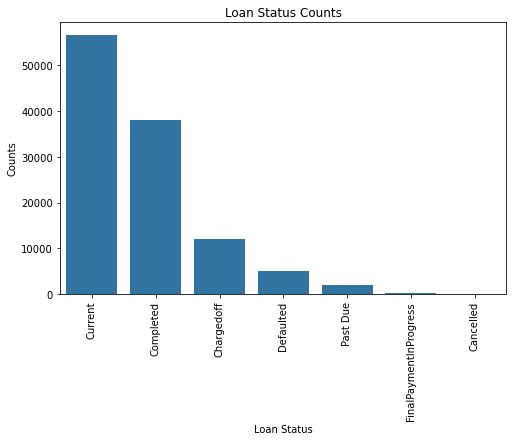

In [10]:
# This is a catgorical data, so Bar chart will be a suitable chart
# Plotting a Bar chart

# Set figsize

plt.rcParams["figure.figsize"] = (8,5)

default_color = sb.color_palette()[0]
sb.countplot(data = loans, x='LoanStatusNow', order = loans.LoanStatusNow.value_counts().index, color = default_color)
plt.xticks(rotation=90)
plt.xlabel('Loan Status')
plt.ylabel('Counts')
plt.title("Loan Status Counts");

#### Observations

The loan that are still in progress (in current loan status) has the highest counts among the total loans on file grouped by loan status. Only a handful of loan have past their due date or defaulted. These could depicts an healthy loan business.

> #### Putting a loans into either a Bad or Good loan group

In [11]:
# Categorize loans into two groups (bad or good)

Good = ['Completed', 'Current', 'Cancelled', 'FinalPaymentInProgress']
GoodLoan = r"\b(?:{})\b".format('|'.join(Good))

Bad = ['Past Due', 'Defaulted', 'Chargedoff']
BadLoan = r"\b(?:{})\b".format('|'.join(Bad))

loans['LoanStatusGroup'] = loans['LoanStatusNow'].replace([GoodLoan, BadLoan], ['GoodLoan', 'BadLoan'], regex=True)
loans.LoanStatusGroup.value_counts()

GoodLoan    94860
BadLoan     19077
Name: LoanStatusGroup, dtype: int64

> #### Plotting a Pie Chart for the Good and bad Loans

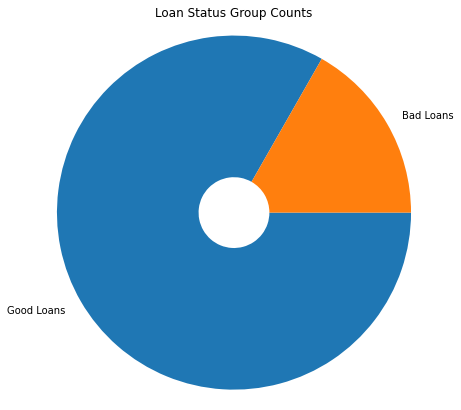

In [12]:
# Creating a pie chart

LoanStatusGroupCounts = loans.LoanStatusGroup.value_counts()
#labels = loans.LoanStatusGroup.value_counts().index

labels = ['Good Loans', 'Bad Loans']

plt_1 = plt.figure(figsize=(7,7))
plt.pie(LoanStatusGroupCounts, labels = labels, startangle =0, counterclock = False, wedgeprops = {'width' : 0.8});
plt.axis('equal');
plt.title("Loan Status Group Counts");

#### Observations

When the loans are grouped into good and bad loans, we can see that good loans (current, completed, cancelled, first-payment-in-progress) carry much value (counts/numbers) in relation to bad loans (defaulted, chargedoff, past-due).

### Checking the distribution of the Credit Score

Here, we will be considering the CreditScoreRangeUpper features, I would have calculated an average of the CreditScoreRangeLower and CreditScoreRangeUpper and use the values to create a new column/variable/feature, but when I investigated the data table I discovered that all borrowers credit score have a diffference of '19' between their CreditScoreRangeLower and CreditScoreRangeUpper, hence one of the two variables could be used for our claculations and visualizations without issue.

In [13]:
# checking the statistical summary of CreditScoreRangeUpper
loans.CreditScoreRangeUpper.describe()

count    113346.000000
mean        704.567731
std          66.458275
min          19.000000
25%         679.000000
50%         699.000000
75%         739.000000
max         899.000000
Name: CreditScoreRangeUpper, dtype: float64

> #### Plotting a Histogram

Since credit score is a numerical variable, Histogram will be a perfect plot to get its distribution

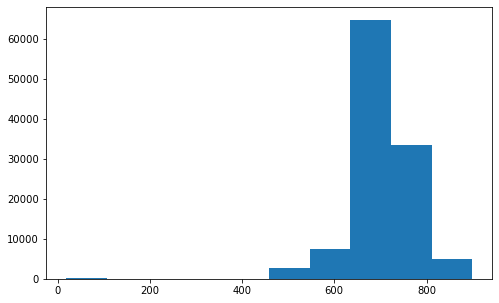

In [14]:
# Plotting a histogram for CreditScoreUpper

plt.hist(data=loans, x='CreditScoreRangeUpper');

Let's increase the bin size of the histogram so as to have a clearer view of the bins in the histogram and get a better overview of the distribution

Text(0.5, 0, 'Credit Score ')

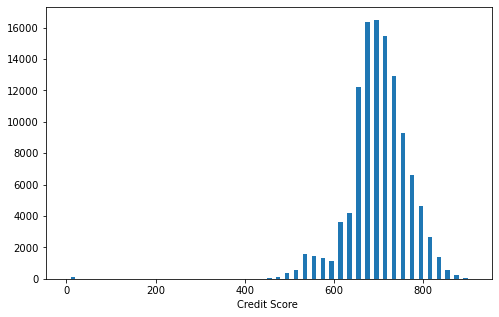

In [15]:
# Change bin size

bins = np.arange(0, loans.CreditScoreRangeUpper.max()+20, 10)

plt.hist(data=loans, x='CreditScoreRangeUpper', bins = bins);
plt.xlabel('Credit Score ')

#### Observations

The Credit score has a kinda normal distribution. It's also shown in the descriptive statistics that the 50% point and the meann are very close

### Checking the distribution of the ProsperRating variable

This is an ordered categorical variable.

In [16]:
# Checking the unique prosper rating values 
loans.ProsperRating.unique()

[NaN, 'A', 'D', 'B', 'E', 'C', 'AA', 'HR']
Categories (7, object): ['HR' < 'E' < 'D' < 'C' < 'B' < 'A' < 'AA']

In [17]:
# Number of borrowers which has ProsperRating values
loans.ProsperRating.value_counts().sum()

84853

In [18]:
# Getting the descriptive statistics
loans.groupby('ProsperRating').ListingKey.describe()

,count,unique,top,freq
ProsperRating,,,,
HR,6935,6917,47C1359638497431975670B,4
E,9795,9716,D9D43597614654117656435,3
D,14274,14170,D59936001866340590808C0,3
C,18345,18096,8474358854651984137201C,4
B,15581,15368,17A93590655669644DB4C06,6
A,14551,14390,349D3587495831350F0F648,4
AA,5372,5325,04C13599434217079754AEE,3


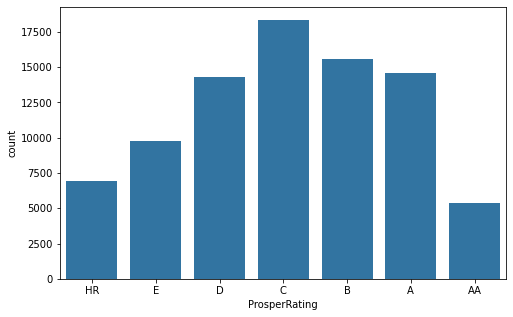

In [19]:
# Plotting a bar chat

sb.countplot(data=loans, x='ProsperRating', color=default_color);

#### Observations

ProsperRating "C" has the highest count of the among the borrowers/loans, and the next three top ratings are B, A and D.

### Checking the Borrower Rate (Interest rate) feature

This is a numerical variable, hence I would be using an histogram to get its distribution

In [20]:
# Getting the descriptive statistics

loans.BorrowerRate.describe()

count    113937.000000
mean          0.192764
std           0.074818
min           0.000000
25%           0.134000
50%           0.184000
75%           0.250000
max           0.497500
Name: BorrowerRate, dtype: float64

> #### Plotting an histogram

Text(0.5, 0, 'Borrower Rates ')

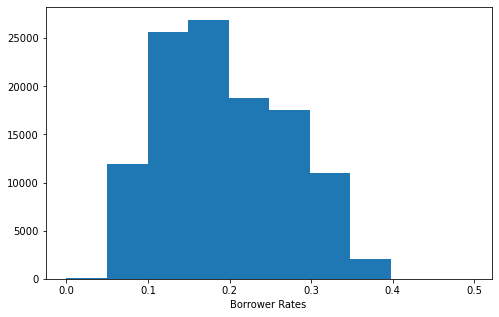

In [21]:
# Plotting an histogram for the borrower rate distribution

plt.hist(data=loans, x='BorrowerRate');
plt.xlabel('Borrower Rates ')

Let's increase the bin size of the histogram so as to have a clearer view of the bins in the histogram and get a better overview of the distribution

Text(0.5, 0, 'Borrower Rates ')

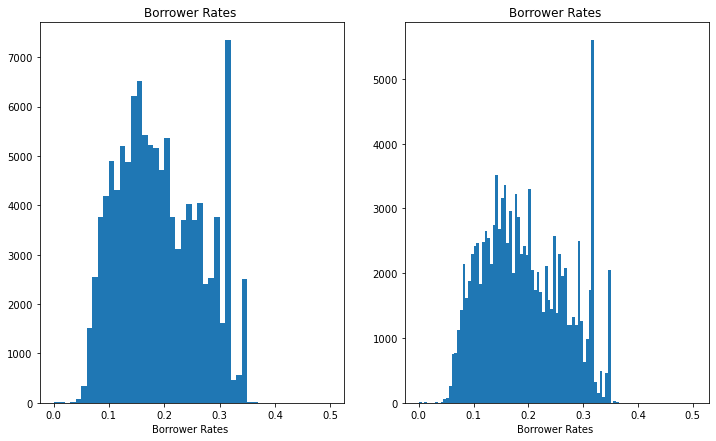

In [22]:
# Change bin size and show two plots side by side for botter overview of the distribution
plt.figure(figsize=[12,7])

plt.subplot(1,2,1)
bins = np.arange(0, loans.BorrowerRate.max()+0.01, 0.01)
plt.hist(data=loans, x='BorrowerRate', bins = bins);
plt.title('Borrower Rates ')
plt.xlabel('Borrower Rates ')

plt.subplot(1,2,2)
bins = np.arange(0, loans.BorrowerRate.max()+0.01, 0.005)
plt.hist(data=loans, x='BorrowerRate', bins = bins);
plt.title('Borrower Rates ')
plt.xlabel('Borrower Rates ')

#### Observations

The distribution of the interest rate (BorrowerRate) have a kinda normal distribution and have a peak at around 0.15 but with a spike at around 0.32, this could be because of an outlier around that point.

### What are the top 5 occupations of the Borrowers who have their loans past-due?

In [23]:
# Getting the number of different occupations
loans.Occupation.nunique()

67

We have 67 unique occupations in the data

In [24]:
# Getting the different occupation names
loans.Occupation.unique()

array(['Other', 'Professional', 'Skilled Labor', 'Executive',
       'Sales - Retail', 'Laborer', 'Food Service', 'Fireman',
       'Waiter/Waitress', 'Construction', 'Computer Programmer',
       'Sales - Commission', 'Retail Management', 'Engineer - Mechanical',
       'Military Enlisted', 'Clerical', nan, 'Teacher', 'Clergy',
       'Accountant/CPA', 'Attorney', 'Nurse (RN)', 'Analyst',
       "Nurse's Aide", 'Investor', 'Realtor', 'Flight Attendant',
       'Nurse (LPN)', 'Military Officer', 'Food Service Management',
       'Truck Driver', 'Administrative Assistant',
       'Police Officer/Correction Officer', 'Social Worker',
       'Tradesman - Mechanic', 'Medical Technician', 'Professor',
       'Postal Service', 'Civil Service', 'Pharmacist',
       'Tradesman - Electrician', 'Scientist', 'Dentist',
       'Engineer - Electrical', 'Architect', 'Landscaping',
       'Tradesman - Carpenter', 'Bus Driver', 'Tradesman - Plumber',
       'Engineer - Chemical', 'Doctor', 'Chemist',


In [25]:
# Getting the top five occupations
TopFiveOccupations = loans.Occupation.value_counts()[:5]
TopFiveOccupations

Other                  28617
Professional           13628
Computer Programmer     4478
Executive               4311
Teacher                 3759
Name: Occupation, dtype: int64

In [26]:
# Getting the top five occupations again 
TopFiveOccupations = loans.Occupation.value_counts()[:6]
TopFiveOccupations

Other                       28617
Professional                13628
Computer Programmer          4478
Executive                    4311
Teacher                      3759
Administrative Assistant     3688
Name: Occupation, dtype: int64

Text(0.5, 1.0, 'Top Five Occupations')

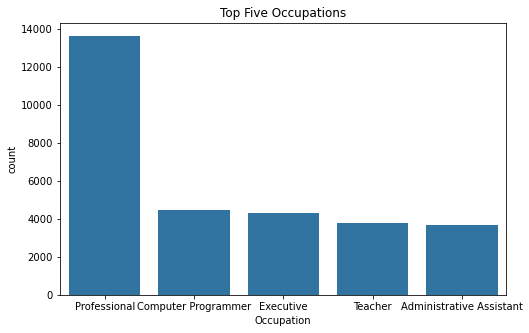

In [27]:
# Plotting a Bar Chart for the top occupations

#TopFiveOccupations = loans.Occupation.value_counts()[:6].tolist()
#TopFiveOccupations

TopFiveOccupations = loans.Occupation.value_counts()[:6]
TopFiveOccupations

sb.countplot(data=loans, x='Occupation', order=['Professional', 'Computer Programmer', 'Executive', 'Teacher', 'Administrative Assistant'], color=default_color);
plt.title('Top Five Occupations')

#### Observations

The top five designated occupations are Professional, Computer Programmer, Executive, Teacher, and Administrative Assistant. I intentionally ommited the Ocupation category named "Other" because, from the data, this occupation category is given to those borrowers whose occupation is not designated in the available entry values.

### What's the distribution of the loan original amount?

In [28]:
# Descriptive statistics of the loan original amounts
loans.LoanOriginalAmount.describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

Text(0.5, 0, 'Loan Original Amount ($)')

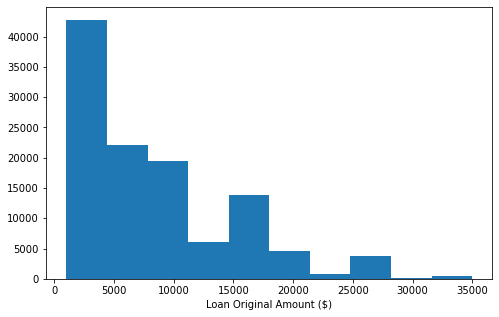

In [29]:
# Plotting an instogram to check the distribution
plt.hist(data=loans, x='LoanOriginalAmount');
plt.xlabel('Loan Original Amount ($)')

Text(0.5, 0, 'Loan Original Amount ($)')

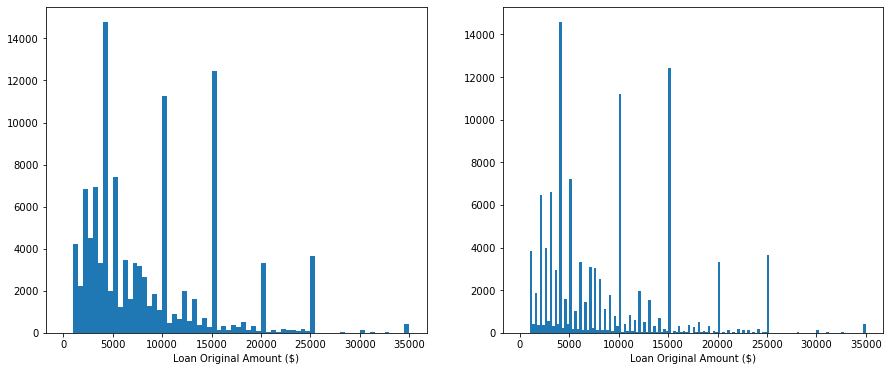

In [30]:
# Resize the histogram bins
plt.figure(figsize=(15, 6))

plt.subplot(1,2,1)
bins = np.arange(0, loans.LoanOriginalAmount.max()+500, 500 )
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins);
plt.xlabel('Loan Original Amount ($)')

plt.subplot(1,2,2)
bins = np.arange(0, loans.LoanOriginalAmount.max()+250, 250 )
plt.hist(data=loans, x='LoanOriginalAmount', bins=bins);
plt.xlabel('Loan Original Amount ($)')

#### Observations

In the case of Loan Original Amount, the small bin size shed more light on the distribution. There are very large spikes in frequency at some points; frequency quickly trails off until the next spike. These probably represent standard loan amounts given to borrowers.

### What's the distribution of the loan terms?

In [31]:
loans.Term.unique()

array([36, 60, 12])

In [32]:
loans.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

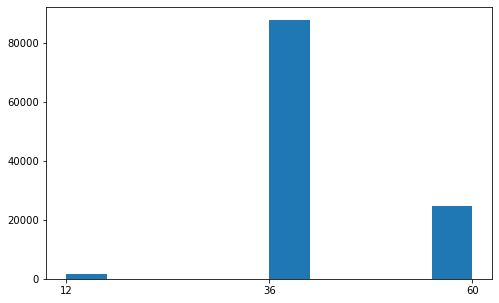

In [33]:
# Plotting a histogram
#bins = np.arange(0, loans.Term.max()+1, 1)
#plt.figure(figsize=(8,5))

ticks = [12, 36, 60]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=loans, x='Term');
plt.xticks(ticks, labels);

The histogram above looks like a bar chart.

This is because the loan term feature values are countable (discrete) and small quaitities of unique values which can pass as categorical as short-term, mid-term and long-term loans.

In [34]:
# Creating a categorical variable from the Term variable 
loans["LoanTerm"] = loans['Term'].astype('category')

loans.LoanTerm.value_counts()

36    87778
60    24545
12     1614
Name: LoanTerm, dtype: int64

Now, let's change the figure labels to words that can be more relatable.
I would have renamed the 12, 16, and 36 terms to ShortTerm, MidTerm and LongTerm respectively, but I don't want remove the quantitative feel which the original values carry. Hence, I will rename them to 12_Months, 36_Months and 60_Months respectively.

In [35]:
# Changing the figures of months to words

loans.LoanTerm.replace([12, 36, 60], ['12_Months', '36_Months', '60_Months'], inplace=True)

loans.LoanTerm.value_counts()

36_Months    87778
60_Months    24545
12_Months     1614
Name: LoanTerm, dtype: int64

Now I'm going to convert the loan terms to an ordered categorical datatype so that we can plot a bar chart on the ordered categories for better visualizations

In [36]:
# Let's transform the loan term feature to an ordered categorical vairable

terms = ['12_Months', '36_Months', '60_Months']

loan_terms = pd.api.types.CategoricalDtype(ordered=True, categories=terms)

loans['LoanTerm'] = loans.LoanTerm.astype(loan_terms)

loans.LoanTerm.value_counts()

36_Months    87778
60_Months    24545
12_Months     1614
Name: LoanTerm, dtype: int64

Text(0.5, 1.0, 'Loan Term Counts')

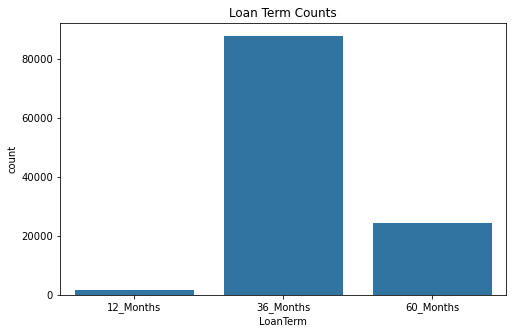

In [37]:
# Plotting a bar chart

sb.countplot(data=loans, x='LoanTerm', color =default_color);
plt.title('Loan Term Counts')

#### Observations

Most of the loans are given out for the 36_Months terms, the 60_Months term follows, while the 12_Months term has the least of the loan on file.

### Having an overview of the Employment Status of the borrowers

In [38]:
loans.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [39]:
loans.EmploymentStatus.nunique()

8

We have 8 distinct (unique) values in the Employment Status column and are categorical variables. Let's plot a bar chart to get the distribution.

Text(0.5, 1.0, 'Employment Status Counts')

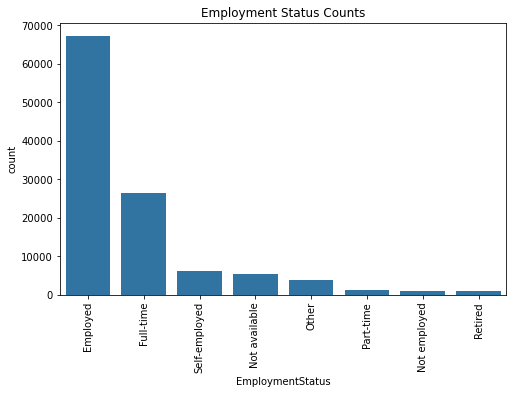

In [40]:
# Plotting a bar chart for EmploymentStatus

plt.xticks(rotation=90)
plt.xlabel('Employment Status')
sb.countplot(data=loans, x='EmploymentStatus', color=default_color, order=loans.EmploymentStatus.value_counts().index);
plt.title('Employment Status Counts')

#### Observations

From the chart, it's obvious Prosper gives loans more to those that are employed (apart from those that are part-time employed), full-time employed and those that are self-employed than other groups of people. It's common sense that a Loan company would prefer to give a loan to someone that well employed than someone who is not fully employed, since a borrower needs a suitable source of income to pay back a loan as required.

### Checking the Distribution of the Home Ownership variable

In [41]:
loans.IsBorrowerHomeowner.value_counts()

True     57478
False    56459
Name: IsBorrowerHomeowner, dtype: int64

This is a boolean categorical variable.

In [42]:
loans.IsBorrowerHomeowner.isnull().sum()

0

There's no row with missing value in the IsBorrowerHomeowner column.

Now let's plot a Bar chart for the categorical data.

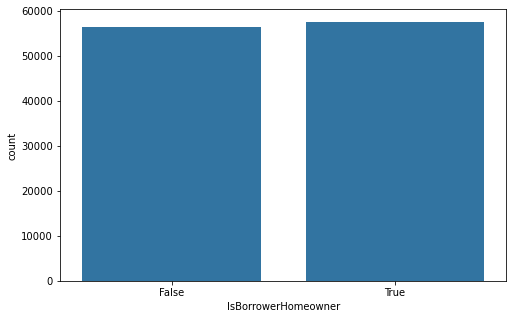

In [43]:
# Plotting a Bar Chart

sb.countplot(data=loans, x='IsBorrowerHomeowner', color=default_color);

#### Observations

It's observed that the number of borrowers who are homeowner and those who are not are almost thesame. Homeownership does not seems to pose as a yardstick for getting loan, we can't say yet though until we make further investigation in the other section of this analysis later.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

With regard to Loan statuses, the loan that are still in progress (in current loan status) has the highest counts among the total loans on file grouped by loan status. Only a handful of loan have past their due date or defaulted. These could depicts an healthy loan business. There was no need to perform any transformation on the variable.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There was no unusual distribution in the variables investigated. However, the Loan term variable was needed to be converted into an ordered categorical variable since we only have three unique Loan term and these could easily pass as an ordered category to group the loans easily so as to carry out more investigation into the variables relationship. The loan ProsperRating variable was also converted to an ordered categorical variable as well since it's a categorical variable with distinct order.

## Bivariate Exploration

In this section, I will be investigating the relationships between pairs of variables in the
data.

Let's check the pairwise correlation between the variables.

In [44]:
# Grouping the variables/features in numeric and categorical vairables

num_vars = ['CreditScoreRangeUpper', 'BorrowerRate', 'LoanOriginalAmount', ] # num_vars = numeric variables
cat_vars = ['LoanStatusNow', 'ProsperRating', 'EmploymentStatus', 'LoanTerm', 'IsBorrowerHomeOwner'] # cat_vars = categorical variables

### I will first check the correlation between the numeric variables using a correlation plot

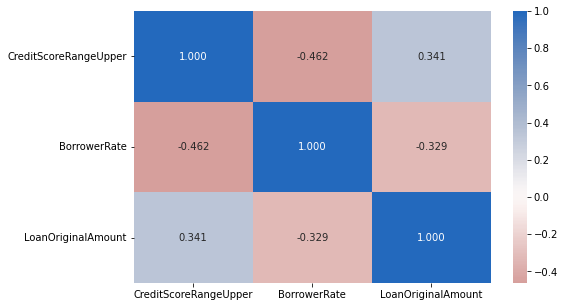

In [45]:
# Creating a correlation plot to check the correlation and correlation coefficient among the variables.

plt.figure(figsize = [8, 5])
sb.heatmap(loans[num_vars].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

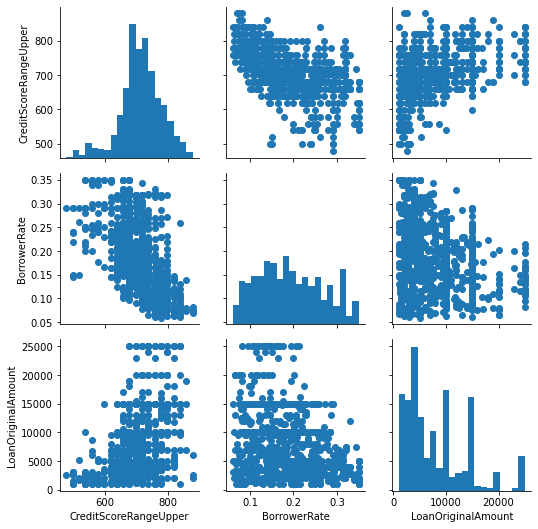

In [46]:
# Creating a plot matrix to check the correlation among the variables altogether at once.
# I want the plot to be clearer and run faster, so I woild be using a sample of 800 of the loans data.

samples = np.random.choice(loans.shape[0], 800, replace = False)
loansSample = loans.loc[samples,:]

g = sb.PairGrid(data = loansSample, vars = num_vars);
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

The correlation between Credit Score and Borrower rate (Interest rate) mildly-strong negative correlation and this makes sense since a borrower who has a high credit score is seen as a low-risk borrower and could get a lower interest rate if the interest rate varies and credit score is used as a determinant.

Also, Credit Score and approved Loan amount have a mildly-strong positive correlation. This also should not be a surprise since a high credit score depicts the borrower ia a low risk client and as such could easily have a higher amount approved to him as a loan.

As shown from the plots, the borrower rate (interest rate) and Loan amount have a kinda negative correlation and this could mean that those borrowers who receive loans of an high amount tends to have lower interest rates (borrower rate).

### Now, let's check relationship between the categorical variables

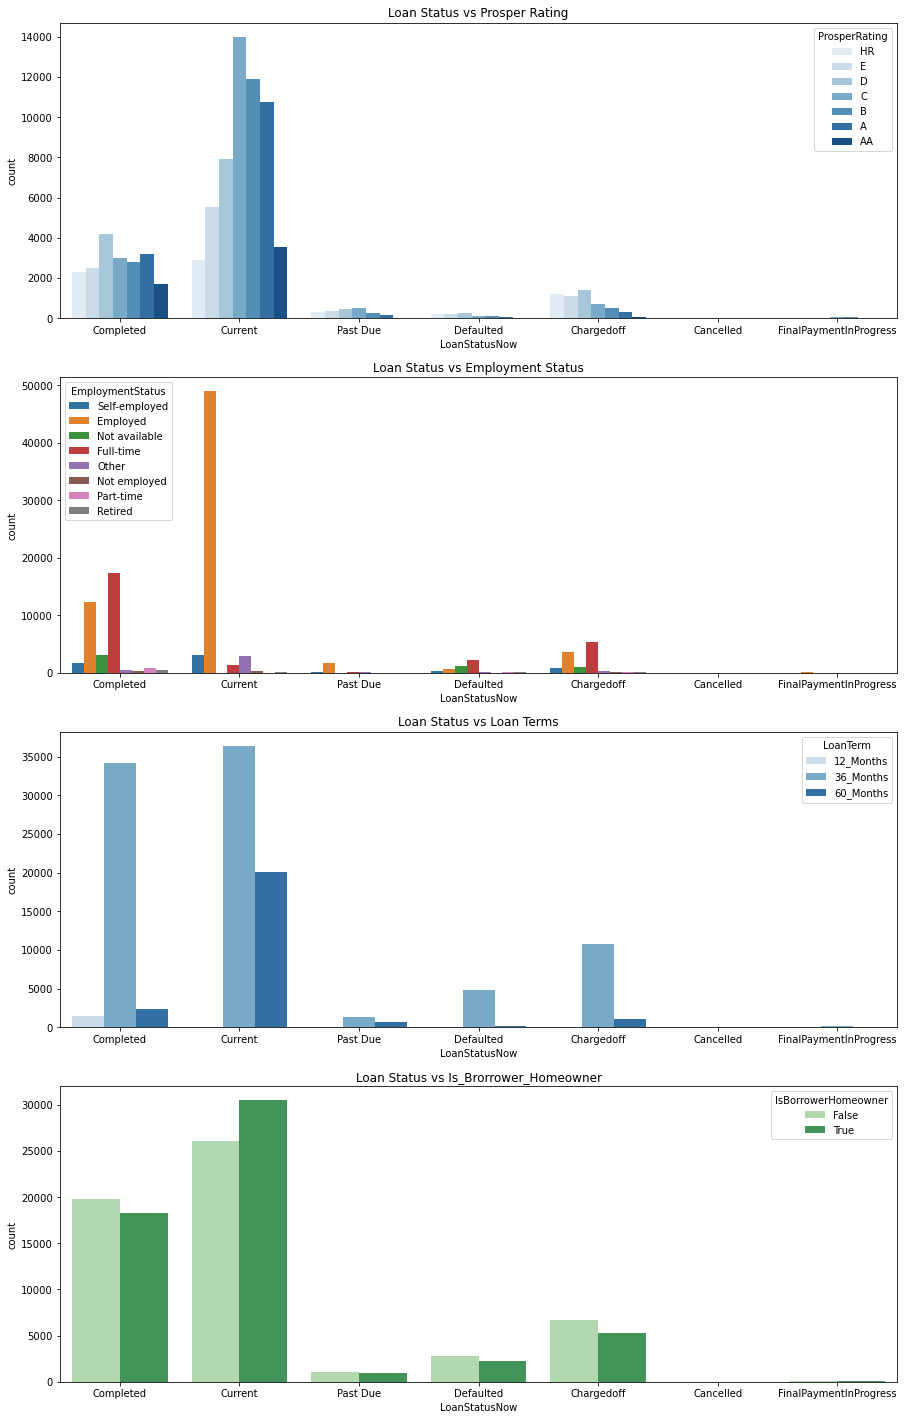

In [47]:
# Platting a Clustered bar charts for getting the relationship between the categorical variables

# cat_vars = categorical variables
cat_vars = ['LoanStatusNow', 'ProsperRating', 'EmploymentStatus', 'LoanTerm', 'IsBorrowerHomeowner']

#samples = np.random.choice(loans.shape[0], 1000, replace = False)
#loansSample = loans.loc[samples,:]

plt.figure(figsize=(15,25))

ax = plt.subplot(4,1,1)
sb.countplot(data=loans, x='LoanStatusNow', hue='ProsperRating', palette='Blues');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Loan Status vs Prosper Rating');

ax = plt.subplot(4,1,2)
sb.countplot(data=loans, x='LoanStatusNow', hue='EmploymentStatus');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Loan Status vs Employment Status');

ax = plt.subplot(4,1,3)
sb.countplot(data=loans, x='LoanStatusNow', hue='LoanTerm', palette='Blues');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Loan Status vs Loan Terms');

ax = plt.subplot(4,1,4)
sb.countplot(data=loans, x='LoanStatusNow', hue='IsBorrowerHomeowner', palette='Greens');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Loan Status vs Is_Brorrower_Homeowner');


We can observe some good interactions between Loan status and Propser rating. 
Borrowers with Prosper rating of D and A have the highest count for completed loans, while for the loans in Current status, borrowers with Prosper rating of A, B and C have the highest counts. Other loan statuses seems to have very few occurences in the data so that makes their portion on the plot less visible.

I will now check the relationship between the other categorical variables of interest

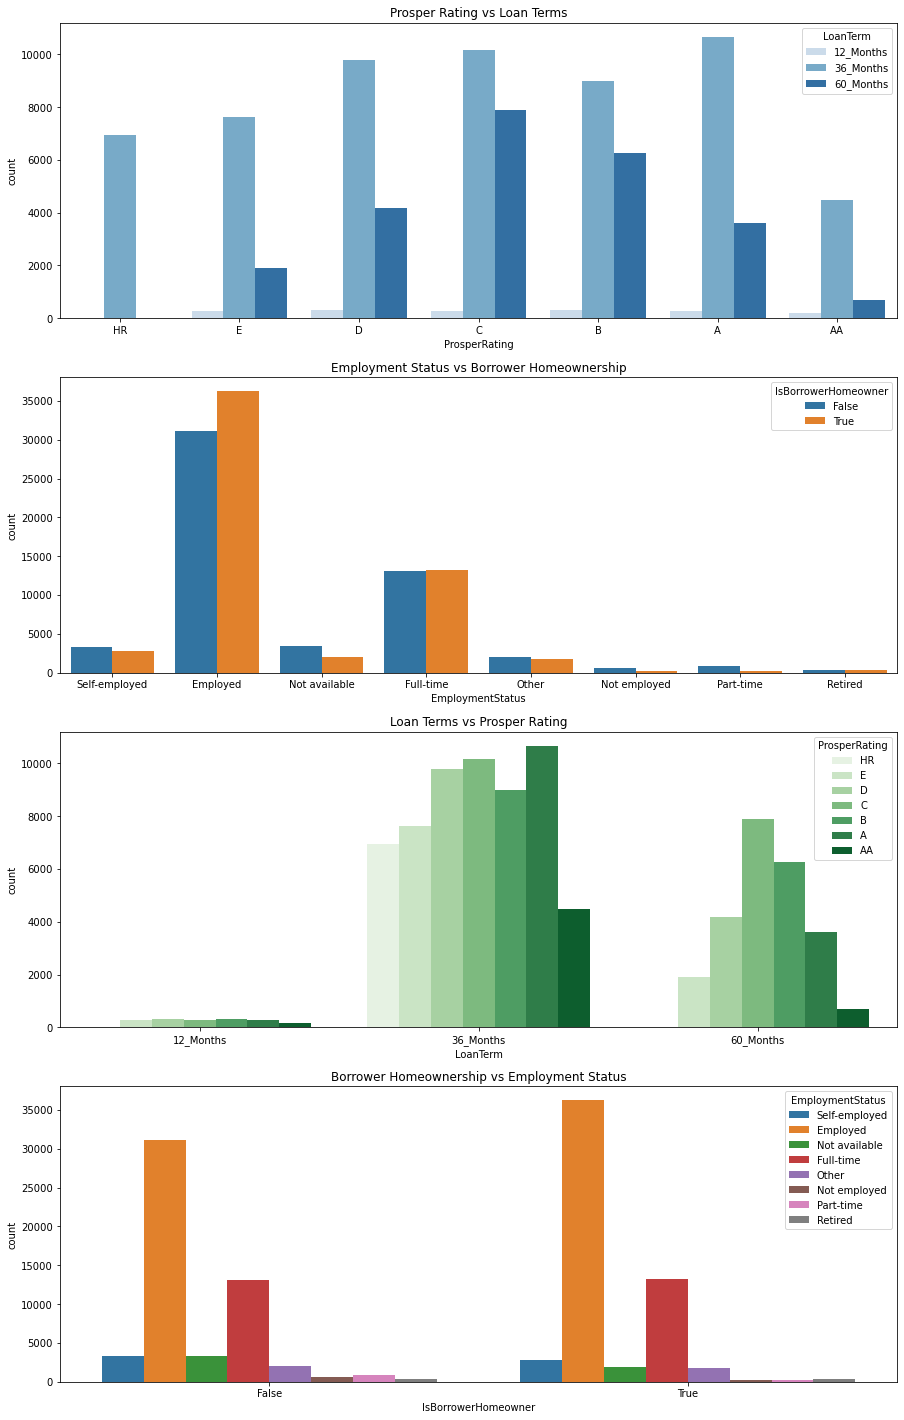

In [48]:
# Plotting some clustered bar charts

plt.figure(figsize=(15,25))

# Check relationship between Prosper Rating and Loan Terms
ax = plt.subplot(4,1,1)
sb.countplot(data=loans, x='ProsperRating', hue='LoanTerm', palette='Blues');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Prosper Rating vs Loan Terms');

# Check relationship between Employment Status and Homeownership
ax = plt.subplot(4,1,2)
sb.countplot(data=loans, x='EmploymentStatus', hue='IsBorrowerHomeowner');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Employment Status vs Borrower Homeownership');


# Check relationship between Prosper Rating and Loan Terms
ax = plt.subplot(4,1,3)
sb.countplot(data=loans, x='LoanTerm', hue='ProsperRating', palette='Greens');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Loan Terms vs Prosper Rating');

# Check relationship between Employment Status and Homeownership
ax = plt.subplot(4,1,4)
sb.countplot(data=loans, x='IsBorrowerHomeowner', hue='EmploymentStatus');
#ax.legend(loc = 2, ncol = 1) # re-arrange legend to remove overlapping
plt.title('Borrower Homeownership vs Employment Status');

There are some interaction between the Prosper rating and loan terms. It's shown that majority of the loans are given out for 36_Months terms. It's also observed that in the 36_Months loan term, the highest counts goes for borrowers with Prosper rating D, C and A, while for the 60_Months loan term, the highest count goes for D, C and B.

### It's now time to check the relationship between some of the numerical and categorical variables

In [49]:
# For reference, as declared earlier

num_vars = ['CreditScoreRangeUpper', 'BorrowerRate', 'LoanOriginalAmount', ] # num_vars = numeric variables
cat_vars = ['LoanStatusNow', 'ProsperRating', 'EmploymentStatus', 'LoanTerm', 'IsBorrowerHomeOwner'] # cat_vars = categorical variables

I will be checking to observe relationship between Credit score, Interest rate (Borrower rate), Loan amount, Loan status, and Prosper rating.

<Figure size 720x720 with 0 Axes>

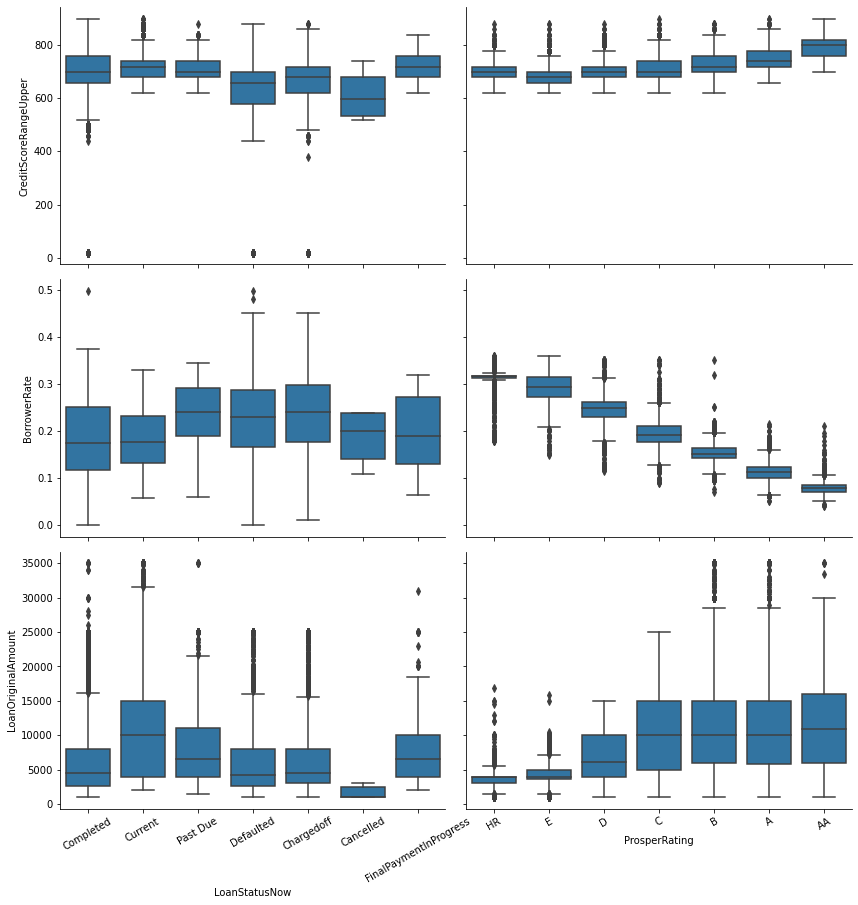

In [50]:
# Creating a plot matrix to check the correlation among selected variables.

plt.figure(figsize = [10, 10])
default_color = sb.color_palette()[0]

g = sb.PairGrid(data = loans, y_vars = num_vars, x_vars = ['LoanStatusNow', 'ProsperRating'],
                height = 4, aspect = 1.5);
g.map(sb.boxplot, color=default_color);

for ax in g.axes.flatten():
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30) //This also works
    plt.setp(ax.get_xticklabels(), rotation=30)

plt.show();

#### Observations

Let us take the observations from the pairs one after the other.

The Credit score of borrowers who have their loan cancelled happens to be the lowest in average, probably the loan company discovered that their credit score is below what's required and cancelled their loan (or the loans did not eventually get disbursed). The borrowers who have their loans Past-due Defaulted happen to have the lower credit score (CreditScoreRangeUpper) in average.

When checking the Credit score and Proper rating relationship, a kinda parabolic curve is detected, however, if we remove the credit score of the borrowers with 'HR' Prosper rating, all other borrowers Proper Rating have a positive relationship with Credit Score, that is, apart from the 'HR' Prosper rating borrowers, the higher the Credit score of the other borrowers, the higher the Proper Rating.

The loans that were completed happens to have the lowest interest rate (BorrowerRate), while the three negative loans outcomes (past due, Chargedoff, Defaulted) happen to have the highest interest rate.

As expected, Prosper rating and Interest rate (BorrowerRate) have a negative relationship. The better the Prosper rating, the lesser the interest rate.

Interestingly, loans that were completed have lower Loan amount than loans that are still in Current status and loans that are Past-due.And it's discovered that Cancelled loans had the lowest Loan amount.

It's shown from the plot that borrowers with the very low Proper Rating get the smaller loan amount disbursed to them. The relationship between the disbursed loan amount (OriginalAloanAmount) and Prosper rating (ProsperRating) is positive. An upward (positive) movement is observed in the LoanOriginalAmount vs ProsperRating plot, It's observed that those borrowers with higher Prosper rating gets higher Loan amount disbursed to them.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

There are some noticeable interaction between Loan status and Prosper rating. For completed loans, borrowers with Prosper rating of D and A have the highest count, and for the loans in Current status, borrowers with Prosper rating of A, B and C have the highest counts. The loans with status "Cancelled" and "FirstPaymentInProgress" have too low counts, hence not well visible on the plot.

For the Loan Status versus Employment Status plots, there are some good visible interations, it's shown that majority of the borrowers on file are employed and many fulltime employed. Those that have completed their loans are mostly "employed" or "fulltime", and for the Current loan status, borrowers who fall under "employed" status carries the largest count/number. Also, too little values for "cancelled" and "FirstPaymentInProgress" make their portion on the chart less visible.

When I checked the relationship between the Loan Status and Loan Terms, the 36_Months loan terms carry the largest number of the loans throughout all all loan statuses.

Some interactions are seen in the Loan Status versus the Homeownership variable, however, there's a close margin between the counts of those who are homeowners and those who are not accross all the Loan statuses. We may not be able to use Homeownership as a differentiator in the loan status variable because of these close gaps across board.

As one would expect, Borrowers with lower Credit score are found with Cancelled, Chargedoff and Defaulted loan statuses. And those whose loan status are Defaulted, Past-due and Chargedoff happen to have the highest interest rates (Borrower Rate), Also, Cancelled loans happens to have the lowest Loan amount and the loan amount for Current loans happen to be the highest.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

I checked the relationship between Homeownership and Employment status, those who are homeowners and those who are not are almost evenly distributed along the Employment statuses. And I crossedchecked by inversing the plot, that is plotting Employment status against homeownership and got similar result.

I carried out the same steps for Prosper rating and Loan terms as well, it's shown that majority of the loans are given out for 36_Months terms. It's also observed that in the 36_Months loan term, the highest counts goes for borrowers with Prosper rating D, C and A, while for the 60_Months loan term, the highest count goes for D, C and B.

As expected Prosper Rating has a positive relationship with Credit score, Borrower rate (Interest rate) and also Loan amount (OriginalLoanAmount).

## Multivariate Exploration

In this section, I will be investigating the Feature of interest which is Loan Status (Loan outcome) in relation to features like Interest rate (Borrower rate), Credit Score, Prosper Rating as these three have some some great interaction with the principal features so well from the previous investigations.

Firstly, let's plot Loan Status against Borrower Rate on different Propser Rating values

<Figure size 1440x1440 with 0 Axes>

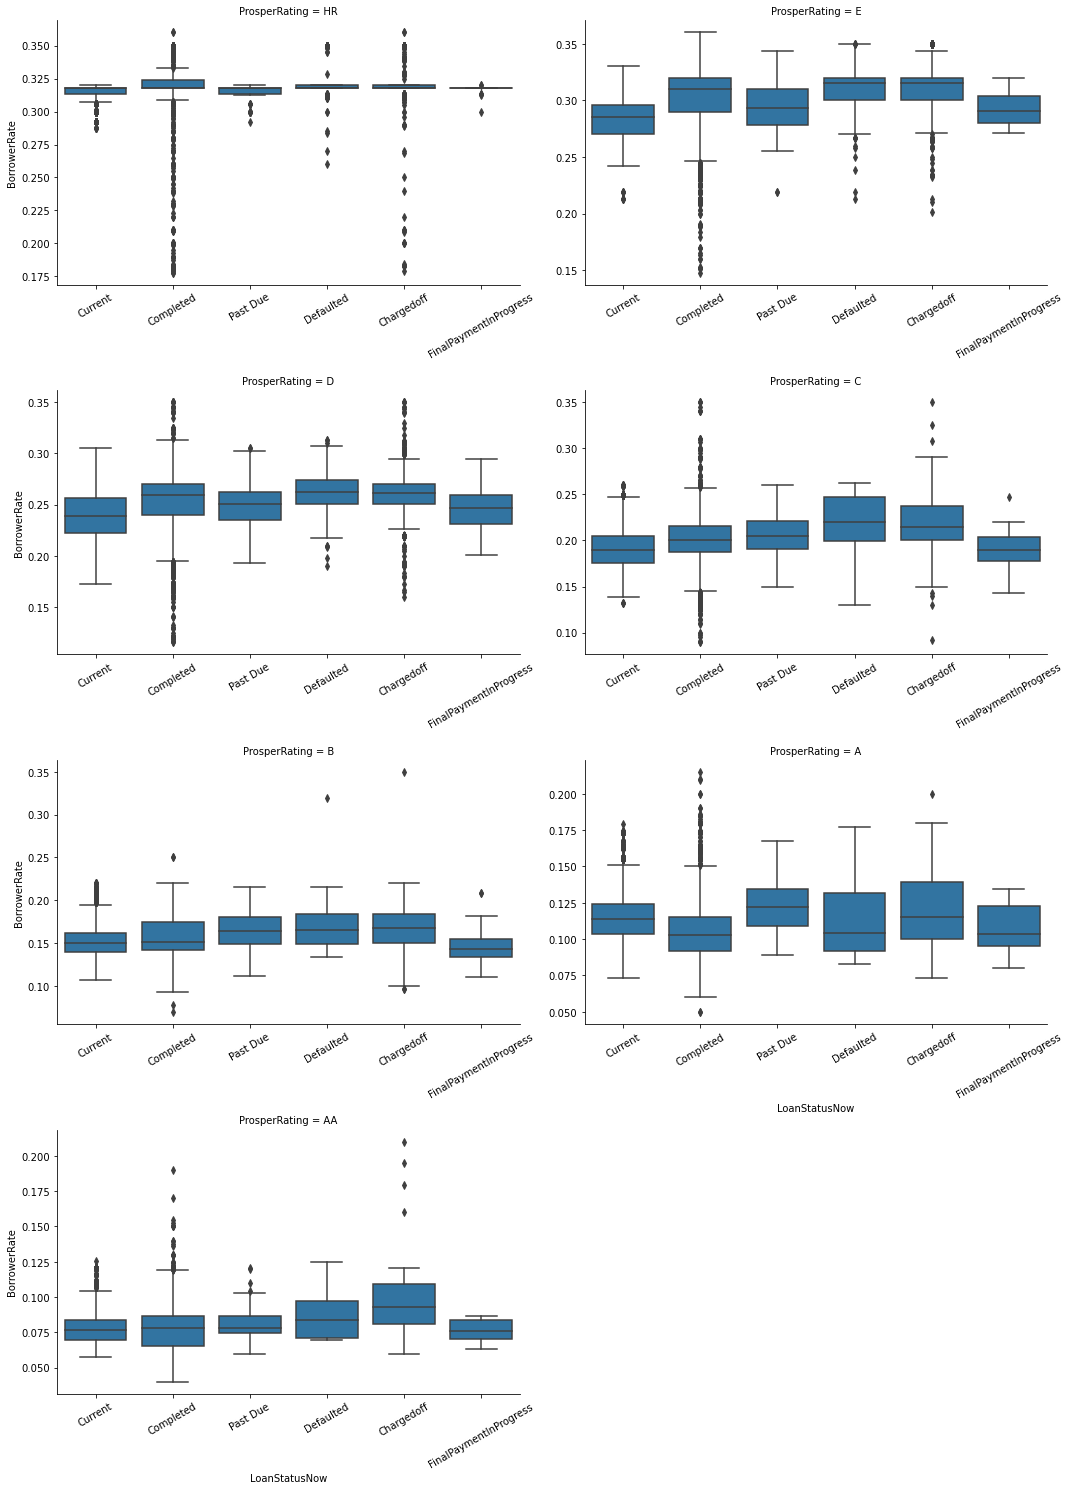

In [51]:
# Loan Status vs Borrower rate plotted on Prosper Rating

plt.figure(figsize=(20,20))

g = sb.FacetGrid(data = loans, col = 'ProsperRating', height = 5, col_wrap=2, sharex=False, sharey=False, aspect=1.5)
g.map(sb.boxplot, 'LoanStatusNow', 'BorrowerRate', order = ['Current', 'Completed', 'Past Due', 'Defaulted', 'Chargedoff', 'FinalPaymentInProgress']);
plt.subplots_adjust(hspace=0.4)
#g.fig.tight_layout()

for ax in g.axes.flatten():
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30) //This also works
    plt.setp(ax.get_xticklabels(), rotation=30)

#### Observations

It's observed from the plots above that the Borrower Rate (Interest rate) of the loans given to borrowers with the highest/best Prosper Rating (AA and A) happen to be the lowest. This further substantiates the prior plots which involved Prosper Rating and Borrower Rate which showed a negative relationship, i.e, the better the Prosper Rating, the lower the Borrower rate.

Loans with Defaulted and Chargedoff statuses happened to have the highest Borrower Rate in many of the plots, except at the Propser Rating of 'A'where the 'Past Due' Loan Status happened to have a higher Borrower Rate than 'Defaulted'.

We can also see from the plots above that the Current Loans and loans which has their final payment in progress, i.e loans with Loan Status "FinalPaymentInProgress" happened to have the lowest interest rate (BorrowerRate).

I'm now going to visualize the relationship between the Borrower Rate and Prosper Rating on each Loan Status value

<Figure size 1440x1440 with 0 Axes>

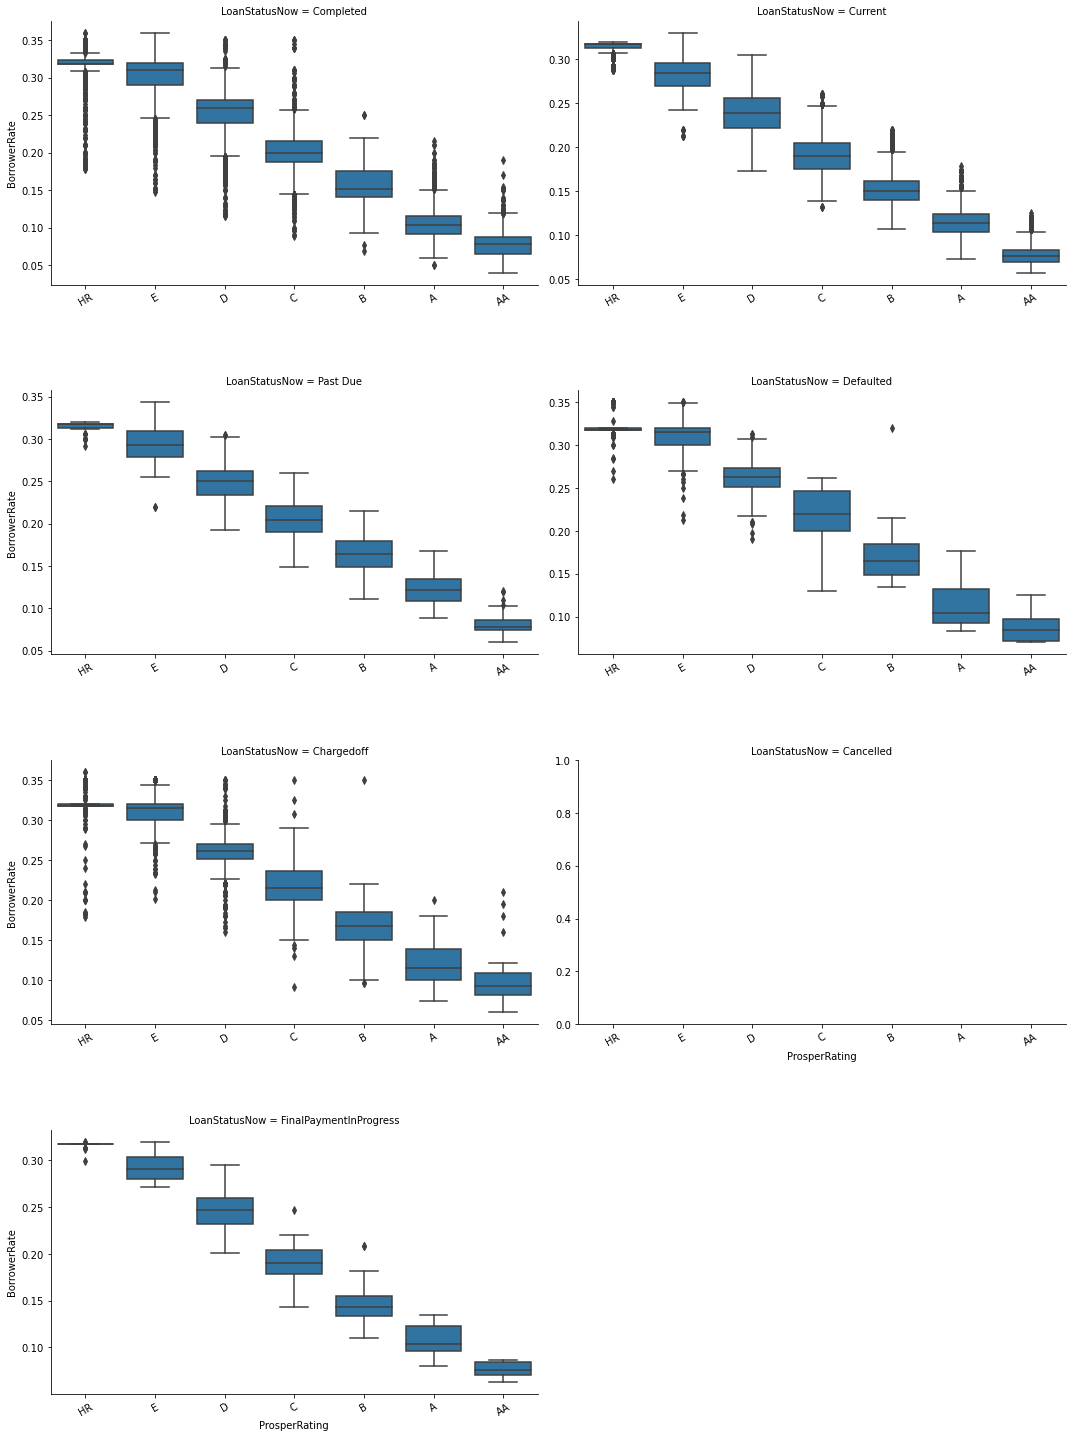

In [52]:
# Borrower rate vs Prosper Rating plotted on Loan Status

plt.figure(figsize=(20,20))

g = sb.FacetGrid(data = loans, col = 'LoanStatusNow', height = 5, col_wrap=2, sharex=False, sharey=False, aspect=1.5)
g.map(sb.boxplot, 'ProsperRating', 'BorrowerRate', order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']);
plt.subplots_adjust(hspace=0.4)
#g.fig.tight_layout()

for ax in g.axes.flatten():
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30) //This also works
    plt.setp(ax.get_xticklabels(), rotation=30)

#### Observations

The plots above took it a step further to butress our last observation that the better the ProsperRating, the lower the BorrowerRate (Interest rate) for the loans. This is consistent across board as we can see same relationship occurs on all loan statuses (LoanStatusNow/LoanStatus).

<Figure size 1440x1440 with 0 Axes>

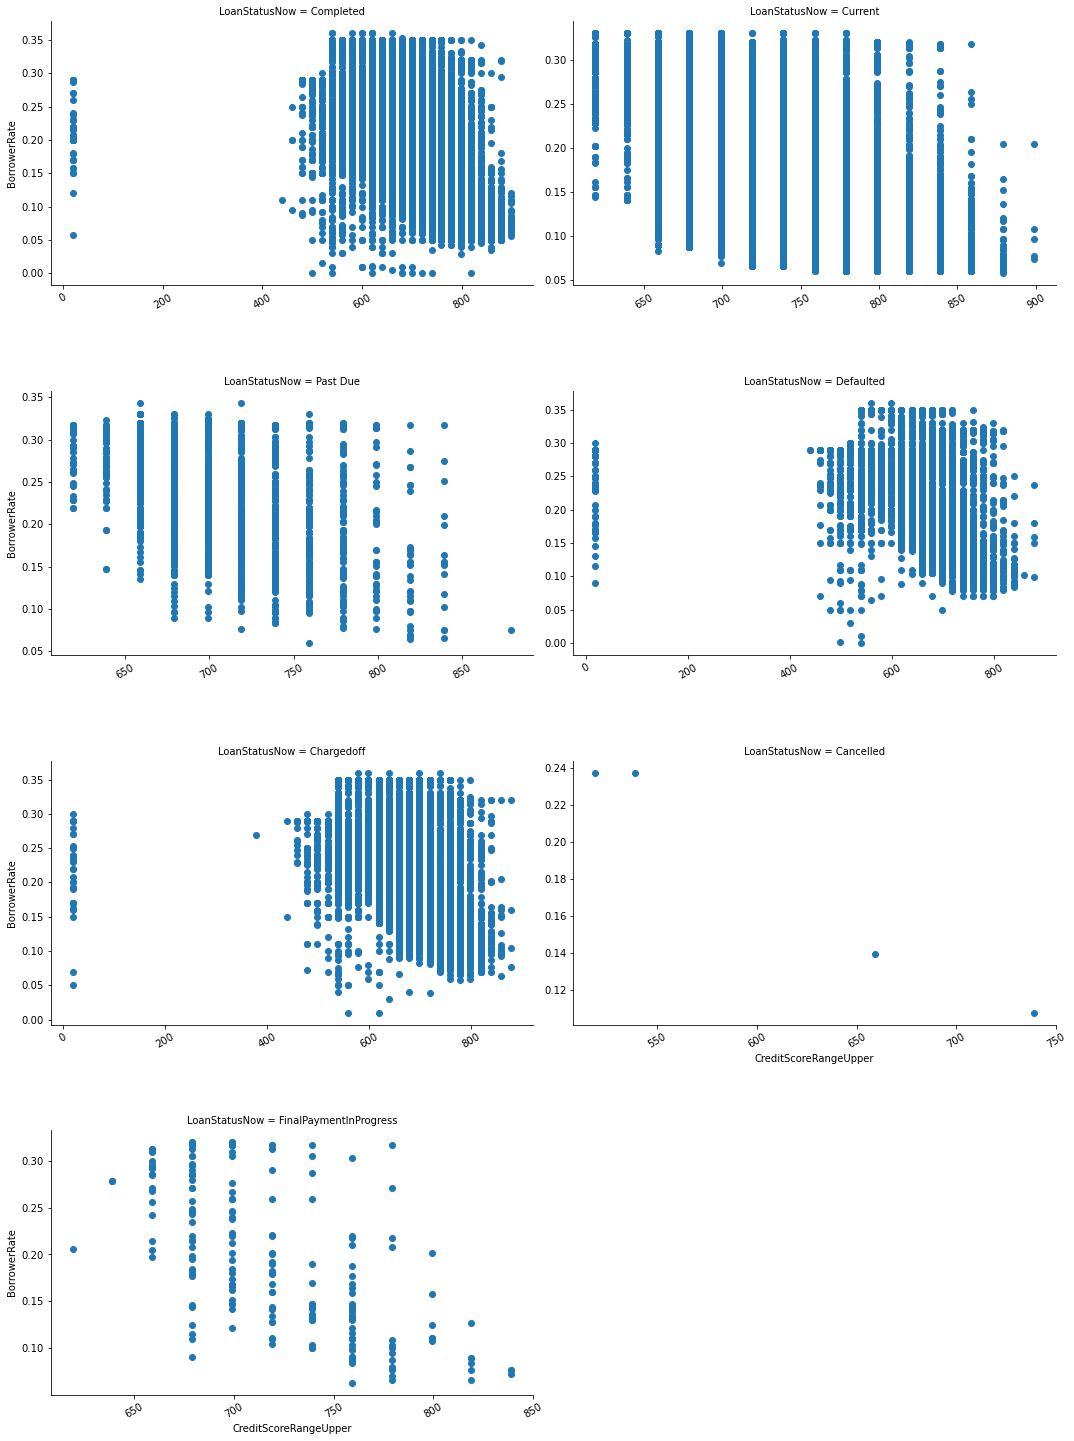

In [53]:
# Borrower rate vs Credit Score plotted on Loan Status

plt.figure(figsize=(20,20))

g = sb.FacetGrid(data = loans, col = 'LoanStatusNow', height = 5, col_wrap=2, sharex=False, sharey=False, aspect=1.5)
g.map(plt.scatter, 'CreditScoreRangeUpper', 'BorrowerRate');
plt.subplots_adjust(hspace=0.4)
#g.fig.tight_layout()

for ax in g.axes.flatten():
    #ax.set_xticklabels(ax.get_xticklabels(),rotation=30) //This also works
    plt.setp(ax.get_xticklabels(), rotation=30)

#### Observations

The plots above further proved that there is a negative relationship between Borrower Rate and Credit Score. As stated earlier/previously in this analysis, it is obvious why this happens as it's expected that a borrower with a high/very positive Credit score to be seen as a low-risk borrower and thereby getting loans at a cheaper rate (at a very cheap Interest rate/Borrower rate).

As we can also note from the plots above, we can see that the charts of loans that are in progress look similar (loans with status; Current, Past Due, FinalPaymentInProgress), and loans that have ended also have similar charts (loans with status Completed, Chargedoff, Defaulted).


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

It's observed that loans with the highest Borrower rate are mostly in the Chargedoff, Defaulted and Past Due loan statuses. Also, across board (in all loan statuses), negative relationships are observed between Borrower rate and Credit score, same negative relationship existed between Prosper Rating and Borrower Rate across all loan statuses as well.

### Were there any interesting or surprising interactions between features?

There happens not be any surprising interaction between features in these multivariate plots as almost all observations are further buttressing some of the interactions that have been discovered in the bivariate plots earlier. Examples of such observations are the nagative relationship between Credit Score and Borrower Rate across all Loan statuses, and the negative relationship between Prosper Rating and Borrower Rate.

## Conclusions

This analysis project focus on exploring and analyzing the "ProsperLoan.csv" dataset which is a dataset of loans with multiple features and the objective of the analysis is figuring out the factors that affects the outcome of a loan. This requires adequate visualizations so as to shed light on relationships between features and draw insights from the visualizations. 

More than 15 visualization plots are generated followed by observations from each plot provided after each plot so as to communicate adequately what's derived from the charts and the message to put mind to from the charts.

Our principal feature of interest is the LoanStatus which is adjusted to form a new column as "LoanStatusNow" which is then used in place of LoanStatus throughout the analysis. Other features explored are Credit Score (CreditScoreRangeUpper), Prosper Rating (ProsperRating), Occupation, Borrower Rate or Interest Rate (BorrowerRate), Employment Status (EmploymentStatus), Loan Original Amount (LoanOriginalAmount), Loan term (Term), and Borrower Homeownership (IsBorrowerHomeOwner).

### Some of the insights derived from the analysis are listed below:

- The top five designated occupations are Professional, Computer Programmer, Executive, Teacher, and Administrative Assistant.
- Most of the loans are given out for the 36_Months term, the 60_Months term follows, while the 12_Months term has the least of the loan on file.
- Prosper gives loans more to those that are employed (apart from those that are part-time employed), full-time employed and those that are self-employed than other groups of people. It's common sense that a Loan company would prefer to give a loan to someone that well employed than someone who is not fully employed, since a borrower needs a suitable source of income to pay back a loan as required.
- Homeownership does not seems to pose as a yardstick for getting loan as the number of borrowers who are homeowner and those who are not are almost thesame.
- The correlation between Credit Score and Borrower rate (Interest rate) mildly-strong negative correlation and this makes sense since a borrower who has a high credit score is seen as a low-risk borrower and could get a lower interest rate if the interest rate varies and credit score is used as a determinant.
- Also, Credit Score and approved Loan amount have a mildly-strong positive correlation. This also should not be a surprise since a high credit score depicts the borrower ia a low risk client and as such could easily have a higher amount approved to him as a loan.
- Credit Score and Prosper Rating have a positive relationship.
- The borrower rate (interest rate) and Loan amount have a kinda negative correlation and this could mean that those borrowers who receive loans of an high amount tends to have lower interest rates (borrower rate).
- The loans that were completed happens to have the lowest interest rate (BorrowerRate), while the three negative loans outcomes (past due, Chargedoff, Defaulted) happen to have the highest interest rate.
- As expected, Prosper rating and Interest rate (BorrowerRate) have a negative relationship. The better the Prosper rating, the lesser the interest rate.
- As one would expect, Borrowers with lower Credit score are found with Cancelled, Chargedoff and Defaulted loan statuses. And those whose loan status are Defaulted, Past-due and Chargedoff happen to have the highest interest rates (Borrower Rate), Also, Cancelled loans happens to have the lowest Loan amount and the loan amount for Current loans happen to be the highest.
- It's observed from the plots above that the Borrower Rate (Interest rate) of the loans given to borrowers with the highest/best Prosper Rating (AA and A) happen to be the lowest. This further substantiates the prior plots which involved Prosper Rating and Borrower Rate which showed a negative relationship, i.e, the better the Prosper Rating, the lower the Borrower rate.


#### Limitations

- Time constraint is a limitation as this doesn't allow me to explore all the features/columns in the dataset with respect to our feature of interest and against one another.

**Below are the website and tools that were used that aided in the investigation of the dataset**

- <a href="https://www.pandas.pydata.org/"> pandas </a>
- <a href="https://www.matplotlib.org/"> matplotlib </a>
- <a href="https://www.seaborn.pydata.org/"> seaborn </a>